In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#### Low pass filter -- removes edges
#### High pass filter -- complement of low pass filter(retains only the edges)

In [2]:
image1 = Image.open('Data/Data for Hybrid Images/cat.bmp').convert('L') # low pass filter
image2 = Image.open('Data/Data for Hybrid Images/dog.bmp').convert('L') # high pass filter

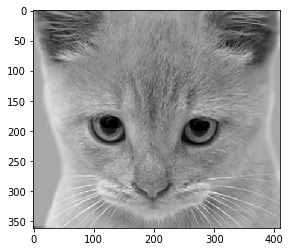

In [3]:
plt.imshow(image1,cmap='gray')

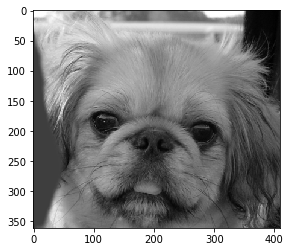

In [4]:
plt.imshow(image2,cmap='gray')

In [5]:
image1 = np.asarray(image1)
image2 = np.asarray(image2)

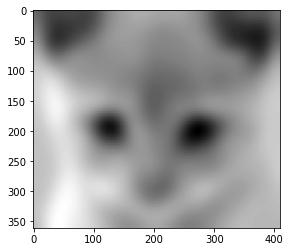

In [6]:
from skimage import feature
from scipy import ndimage as ndi
image1 = ndi.gaussian_filter(image1, 15) # removes the edges
image3 = ndi.gaussian_filter(image2,15)
image2 = image2-image3
plt.imshow(image1, cmap='gray')

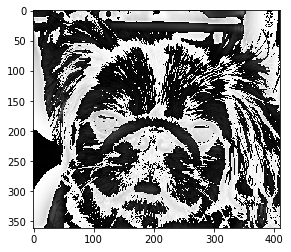

In [7]:
plt.imshow(image2,cmap='gray')

In [10]:
image4 = image2+image1

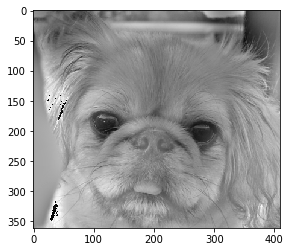

In [11]:
plt.imshow(image4,cmap='gray')

In [13]:
image4.shape

(361, 410)

In [20]:
from scipy.ndimage.interpolation import zoom
small_a = zoom(image4, 0.5)